<a href="https://colab.research.google.com/github/stakunlena/ich_python_for_DA_HW/blob/main/Stakun_HW_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Домашняя работа №17**

Задание 1. Расчет 95% доверительного интервала для доли генеральной совокупности.

1. Смоделируйте опрос населения, в котором 1000 человек отвечают на бинарный вопрос (да/нет). Предположим, что 600 человек ответили "Да".
1. Из этой популяции сделайте выборку из 100 ответов.
1. Рассчитайте долю ответов "Да" в выборке.
1. Вычислите 95%-ный доверительный интервал для популяционной доли ответов "Да".

In [ ]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# 1. Генерируем бинарную выборку (1=Да, 0=Нет)
np.random.seed(0)
data = np.random.binomial(n=1, p=0.6, size=100)  # 100 ответов, вероятность "Да" = 0.6

# 2. Рассчёт доли "Да" и стандартной ошибки
p = np.mean(data)
sem = np.sqrt(p * (1 - p) / len(data))  # стандартная ошибка доли

# 3. Доверительный интервал (95%)
confidence = 0.95
ci = st.norm.interval(confidence=confidence, loc=p, scale=sem)

print(f"Доля 'Да' в выборке p = {p:.3f}")
print(f"95% доверительный интервал: {ci}")

Доля 'Да' в выборке p = 0.620
95% доверительный интервал: (np.float64(0.5248660051214322), np.float64(0.7151339948785678))


Задание 2.

Продемонстрируйте влияние размера выборки на форму распределения средних, используя равномерное распределение.

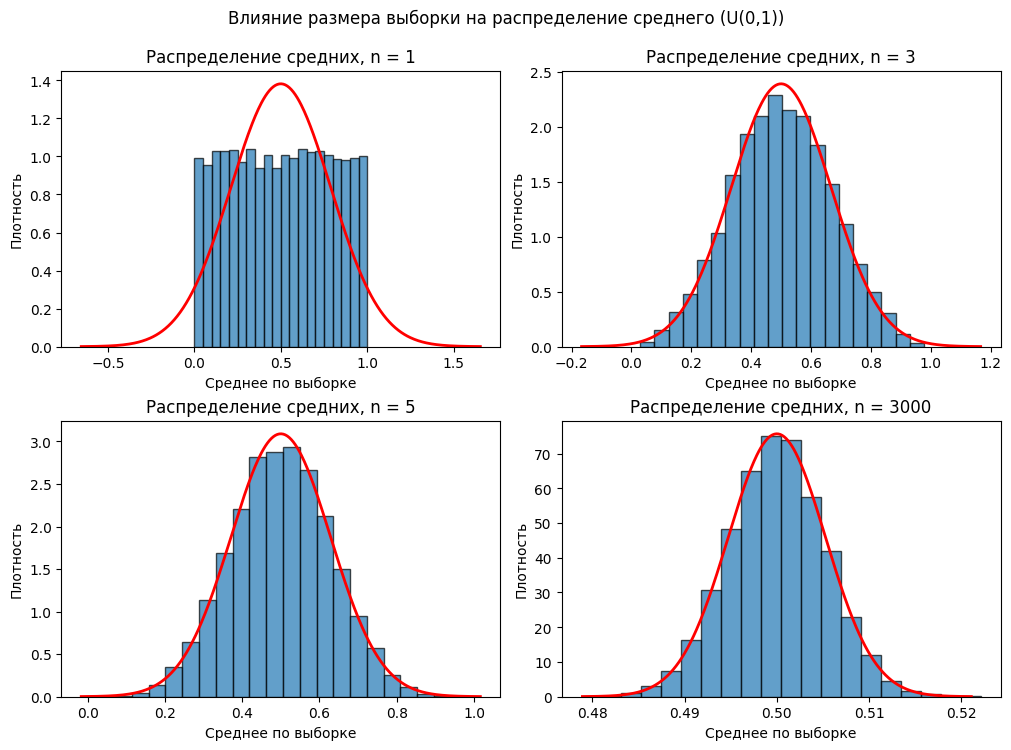

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Параметры эксперимента
rng = np.random.default_rng(42) # воспроизводимость
ns = [1, 3, 5, 3000] # размеры выборок, которые сравним
replicates = 20000 # сколько раз берём выборку и считаем среднее
a, b = 0.0, 1.0 # равномерное U(0,1)
mu = (a + b) / 2 # математическое ожидание U(0,1) = 0.5
var = (b - a)**2 / 12 # дисперсия U(0,1) = 1/12

fig, axes = plt.subplots(2, 2, figsize=(10, 7), constrained_layout=True)

for ax, n in zip(axes.ravel(), ns):
    # 1) Генерируем матрицу выборок: replicates x n из U(0,1)
    samples = rng.uniform(a, b, size=(replicates, n))
    # 2) Считаем среднее по строкам
    means = samples.mean(axis=1)

    # 3) Теоретическое нормальное приближение для среднего:
    #    N(mu, var/n) по ЦПТ
    sigma = np.sqrt(var / n)
    x = np.linspace(mu - 4*sigma, mu + 4*sigma, 400)
    pdf = norm.pdf(x, loc=mu, scale=sigma)

    # 4) Гистограмма средних + теоретическая кривая
    ax.hist(means, bins=20, density=True, alpha=0.7, edgecolor="black")
    ax.plot(x, pdf, "r-", lw=2)

    ax.set_title(f"Распределение средних, n = {n}")
    ax.set_xlabel("Среднее по выборке")
    ax.set_ylabel("Плотность")


plt.suptitle("Влияние размера выборки на распределение среднего (U(0,1))", y=1.05, fontsize=12)
plt.show()